## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
#code
df = pd.read_csv("a.csv", sep=';')

print(df.describe())
print(df.info())
print(f"Розмірність датасету: {df.shape}")

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [40]:
# bank_target = #code
df['y'] = df['y'].map({'yes': 1, 'no': 0})
target = df['y']

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [41]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
print(bank_client.nunique())

age          78
job          12
marital       4
education     8
default       3
housing       3
loan          3
dtype: int64


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Min Age: 17, Max Age: 98
NaN у віці: 0


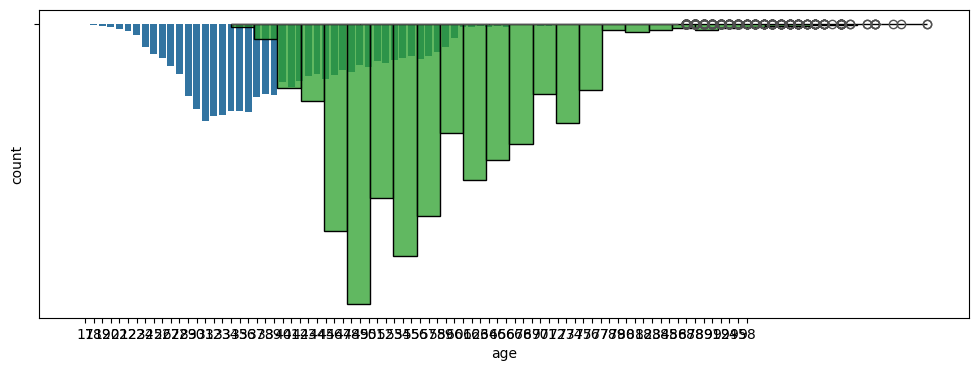

In [42]:
#code
print(f"Min Age: {df['age'].min()}, Max Age: {df['age'].max()}")
print(f"NaN у віці: {df['age'].isna().sum()}")
plt.figure(figsize=(12, 4))
sns.countplot(x='age', data=df)
sns.boxplot(x=df['age'])
sns.histplot(df['age'], bins=30)
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   
2.   
3. ...

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [43]:
def detect_outliers_with_interquantile_range(df, column, low_percentile, high_percentile):
    Q1 = np.percentile(df[column], low_percentile)
    Q3 = np.percentile(df[column], high_percentile)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    return outliers

In [44]:
outliers = detect_outliers_with_interquantile_range(df, 'age', 10, 90)
print(outliers)

       age      job  marital education  default housing loan   contact month  \
38452   98  retired  married  basic.4y  unknown     yes   no  cellular   oct   
38455   98  retired  married  basic.4y  unknown     yes   no  cellular   oct   

      day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
38452         fri  ...         1      2         2      success         -3.4   
38455         fri  ...         2    999         0  nonexistent         -3.4   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
38452          92.431          -26.9       0.73       5017.5  1  
38455          92.431          -26.9       0.73       5017.5  1  

[2 rows x 21 columns]


**Висновки з завдання 5 (детальні)**

1.   
2.   
3. ...

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

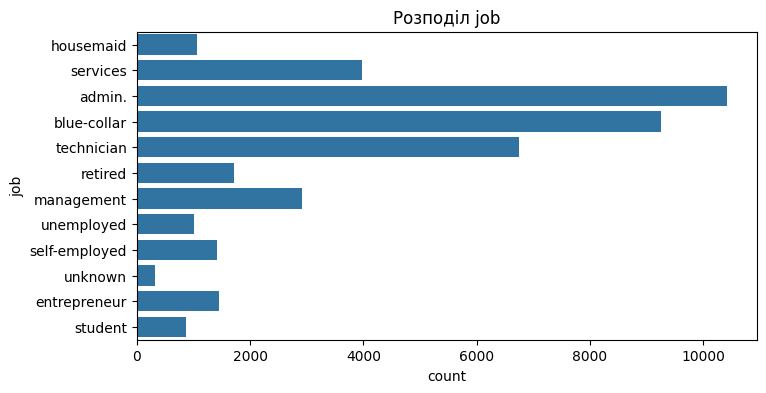

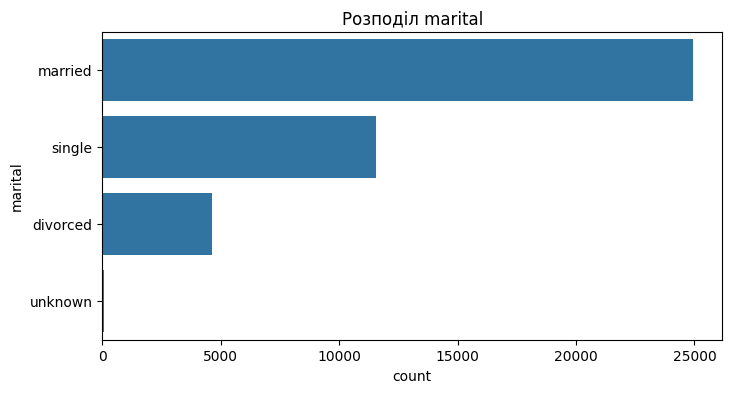

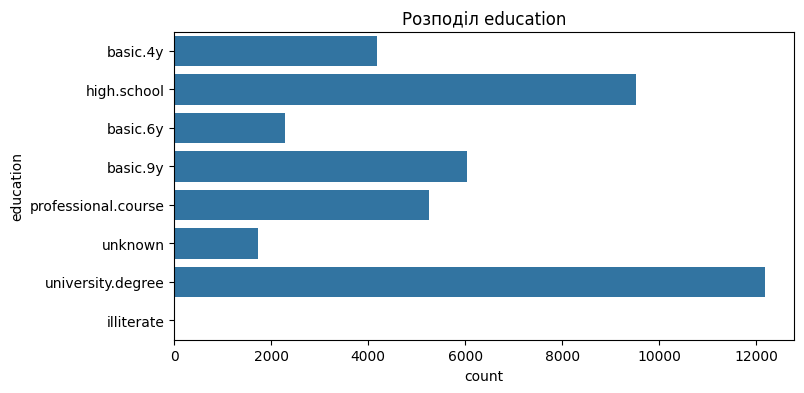

In [45]:
#code
categorical_cols = ['job', 'marital', 'education']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col])
    plt.title(f"Розподіл {col}")
    plt.show()

In [46]:
#code

In [47]:
#code

**Висновки з завдання 6 (детальні)**

1.   
2.   
3. ...

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

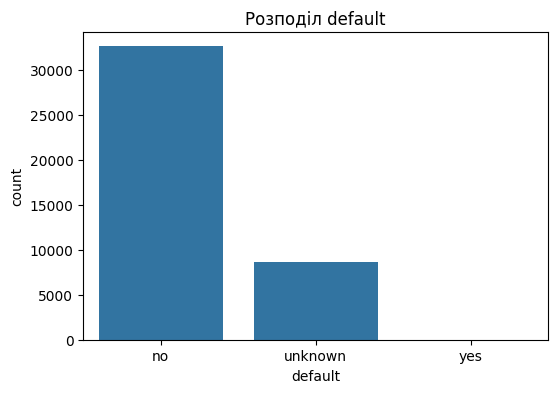

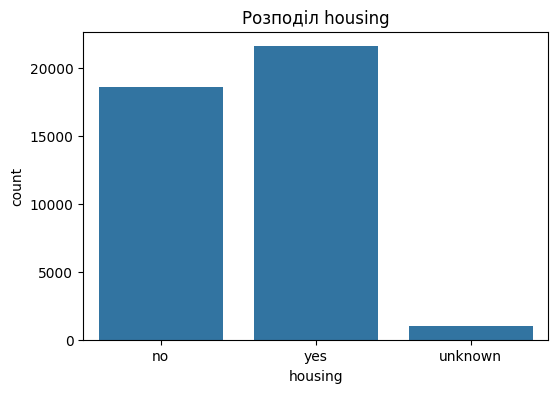

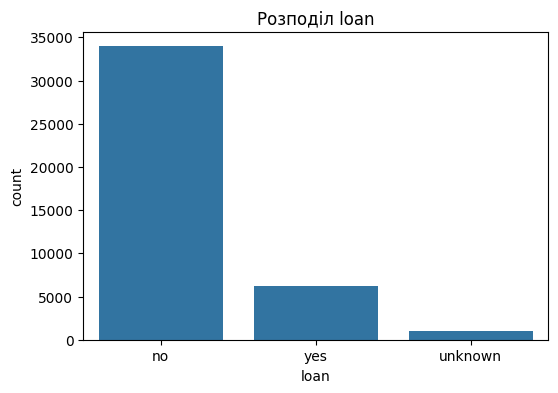

In [48]:
#code
for col in ['default', 'housing', 'loan']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Розподіл {col}")
    plt.show()

In [49]:
#code

In [50]:
#code

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [51]:
def encode_categorical_columns(df, categorical_cols):
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))
    return df


In [52]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
print(bank_client)

       age  job  marital  education  default  housing  loan
0       56    3        1          0        0        0     0
1       57    7        1          3        1        0     0
2       37    7        1          3        0        2     0
3       40    0        1          1        0        0     0
4       56    7        1          3        0        0     2
...    ...  ...      ...        ...      ...      ...   ...
41183   73    5        1          5        0        2     0
41184   46    1        1          5        0        0     0
41185   56    5        1          6        0        2     0
41186   44    9        1          5        0        0     0
41187   74    5        1          5        0        2     0

[41188 rows x 7 columns]


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [53]:
def encode_age(df, age_col):
    df[age_col] = pd.qcut(df[age_col], q=4, labels=[1, 2, 3, 4])
    return df

In [54]:
bank_client = encode_age(bank_client, 'age')
print(bank_client)

      age  job  marital  education  default  housing  loan
0       4    3        1          0        0        0     0
1       4    7        1          3        1        0     0
2       2    7        1          3        0        2     0
3       3    0        1          1        0        0     0
4       4    7        1          3        0        0     2
...    ..  ...      ...        ...      ...      ...   ...
41183   4    5        1          5        0        2     0
41184   3    1        1          5        0        0     0
41185   4    5        1          6        0        2     0
41186   3    9        1          5        0        0     0
41187   4    5        1          5        0        2     0

[41188 rows x 7 columns]


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [55]:
bank_relat = df[['contact', 'month', 'day_of_week', 'duration']]
print(bank_relat.isna().sum())

contact        0
month          0
day_of_week    0
duration       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [56]:
#code
for col in ['contact', 'month', 'day_of_week']:
    print(f"{col}: {df[col].unique()}")

contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



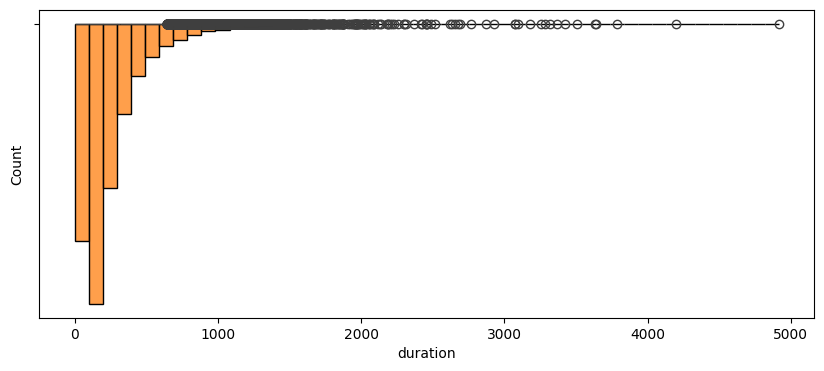

In [57]:
#code
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['duration'])
sns.histplot(df['duration'], bins=50)
plt.show()

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [58]:
#code
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
print(bank_relat)

       contact  month  day_of_week  duration
0            1      6            1       261
1            1      6            1       149
2            1      6            1       226
3            1      6            1       151
4            1      6            1       307
...        ...    ...          ...       ...
41183        0      7            0       334
41184        0      7            0       383
41185        0      7            0       189
41186        0      7            0       442
41187        0      7            0       239

[41188 rows x 4 columns]


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [59]:
def encode_duration(df, duration_col):
    df[duration_col] = pd.qcut(df[duration_col], q=4, labels=[1, 2, 3, 4])
    return df

In [60]:
bank_relat = encode_duration(bank_relat, 'duration')
print(bank_relat)

       contact  month  day_of_week duration
0            1      6            1        3
1            1      6            1        2
2            1      6            1        3
3            1      6            1        2
4            1      6            1        3
...        ...    ...          ...      ...
41183        0      7            0        4
41184        0      7            0        4
41185        0      7            0        3
41186        0      7            0        4
41187        0      7            0        3

[41188 rows x 4 columns]


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [61]:
bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
print(bank_socec)

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0               1.1          93.994          -36.4      4.857       5191.0
1               1.1          93.994          -36.4      4.857       5191.0
2               1.1          93.994          -36.4      4.857       5191.0
3               1.1          93.994          -36.4      4.857       5191.0
4               1.1          93.994          -36.4      4.857       5191.0
...             ...             ...            ...        ...          ...
41183          -1.1          94.767          -50.8      1.028       4963.6
41184          -1.1          94.767          -50.8      1.028       4963.6
41185          -1.1          94.767          -50.8      1.028       4963.6
41186          -1.1          94.767          -50.8      1.028       4963.6
41187          -1.1          94.767          -50.8      1.028       4963.6

[41188 rows x 5 columns]


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [62]:
bank_other = df[['campaign', 'pdays', 'previous', 'poutcome']]
print(bank_other)

       campaign  pdays  previous     poutcome
0             1    999         0  nonexistent
1             1    999         0  nonexistent
2             1    999         0  nonexistent
3             1    999         0  nonexistent
4             1    999         0  nonexistent
...         ...    ...       ...          ...
41183         1    999         0  nonexistent
41184         1    999         0  nonexistent
41185         2    999         0  nonexistent
41186         1    999         0  nonexistent
41187         3    999         1      failure

[41188 rows x 4 columns]


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [63]:
#code
bank_other = encode_categorical_columns(bank_other, ['poutcome'])
print(bank_other)

       campaign  pdays  previous  poutcome
0             1    999         0         1
1             1    999         0         1
2             1    999         0         1
3             1    999         0         1
4             1    999         0         1
...         ...    ...       ...       ...
41183         1    999         0         1
41184         1    999         0         1
41185         2    999         0         1
41186         1    999         0         1
41187         3    999         1         0

[41188 rows x 4 columns]


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [64]:
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)
print(bank_final)

      age  job  marital  education  default  housing  loan  contact  month  \
0       4    3        1          0        0        0     0        1      6   
1       4    7        1          3        1        0     0        1      6   
2       2    7        1          3        0        2     0        1      6   
3       3    0        1          1        0        0     0        1      6   
4       4    7        1          3        0        0     2        1      6   
...    ..  ...      ...        ...      ...      ...   ...      ...    ...   
41183   4    5        1          5        0        2     0        0      7   
41184   3    1        1          5        0        0     0        0      7   
41185   4    5        1          6        0        2     0        0      7   
41186   3    9        1          5        0        0     0        0      7   
41187   4    5        1          5        0        2     0        0      7   

       day_of_week duration  emp.var.rate  cons.price.idx  cons

**Завдання 19** Провести ділення вибірки

In [65]:
def prepare_data_for_training(X, target, test_size, n_splits, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test, k_fold


In [66]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)
print(X_train, X_test, y_train, y_test, k_fold)

      age  job  marital  education  default  housing  loan  contact  month  \
39577   4    5        1          2        0        0     0        0      6   
10104   4    9        1          6        0        2     0        1      4   
17235   2    7        1          3        0        0     0        0      3   
20926   1    0        2          6        0        2     0        0      1   
17626   4    2        1          2        0        2     0        0      3   
...    ..  ...      ...        ...      ...      ...   ...      ...    ...   
12363   1    7        0          3        0        2     2        0      3   
5695    4    2        1          2        0        2     0        1      6   
8006    2   11        1          2        0        0     0        1      4   
17745   3    1        1          7        1        0     2        0      3   
17931   3    1        1          7        0        2     0        0      3   

       day_of_week duration  emp.var.rate  cons.price.idx  cons

In [67]:
def scale_the_data(X_train, X_test):
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    return X_train, X_test


In [68]:
X_train, X_test = scale_the_data(X_train, X_test)
print(X_train, X_test)

[[ 1.37201939  0.35848602 -0.2835433  ...  0.19666714  3.6801034
  -2.54973065]
 [ 1.37201939  1.4726262  -0.2835433  ...  0.19666714 -0.35173005
   0.19195995]
 [-0.40586479  0.91555611 -0.2835433  ...  0.19666714 -0.35173005
   0.19195995]
 ...
 [-0.40586479  2.02969629 -0.2835433  ...  0.19666714 -0.35173005
   0.19195995]
 [ 0.4830773  -0.75565417 -0.2835433  ...  0.19666714 -0.35173005
   0.19195995]
 [ 0.4830773  -0.75565417 -0.2835433  ...  0.19666714 -0.35173005
   0.19195995]] [[-1.29480688  0.91555611 -0.2835433  ...  0.19666714 -0.35173005
   0.19195995]
 [ 1.37201939  1.4726262   1.35496103 ...  0.19666714 -0.35173005
   0.19195995]
 [-0.40586479  0.07995097  1.35496103 ...  0.19666714 -0.35173005
   0.19195995]
 ...
 [-1.29480688 -0.75565417  1.35496103 ...  0.19666714 -0.35173005
   0.19195995]
 [-0.40586479  0.63702106 -0.2835433  ...  0.19666714 -0.35173005
   0.19195995]
 [-0.40586479  0.07995097 -0.2835433  ...  0.19666714 -0.35173005
   0.19195995]]


## Логістична Регресія

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(accuracy_score(y_test, logpred))

[[7110  169]
 [ 633  326]]
0.9026462733673222


## k-NN

In [70]:
#Neighbors
neighbors = np.arange(1, 26)

#Create empty list that will hold cv scores
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=k_fold, scoring='accuracy').mean() for k in neighbors]

#Perform 10-fold cross validation on training set for odd values of k:
optimal_k = neighbors[np.argmax(cv_scores)]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(accuracy_score(y_test, knnpred))

[[7147  132]
 [ 696  263]]
0.8994901675163874


## Логістична Регресія

In [71]:
models = pd.DataFrame({'Models': ['Logistic Regression', 'k-NN'], 'Score': [accuracy_score(y_test, logpred), accuracy_score(y_test, knnpred)]})
print(models.sort_values(by='Score', ascending=False))

                Models     Score
0  Logistic Regression  0.902646
1                 k-NN  0.899490


**Висновки по моделям (детальні)**

1.   
2.   
3. ...